In [105]:
#Improting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [106]:
#Reading Data
housing = pd.read_csv('train.csv')

In [107]:
#Data Exploration
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
housing.shape

(1460, 81)

In [109]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [110]:
housing.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [111]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [112]:
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [113]:
# dropping the columns we want to treat as categorical variables
housing_numeric = housing_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
housing_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [114]:
housing_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


(1453, 81)

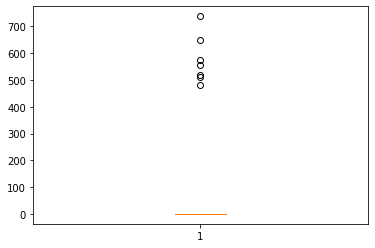

In [115]:
#Outlier Treatment
plt.boxplot(housing['PoolArea'])
Q1 = housing['PoolArea'].quantile(0.1)
Q3 = housing['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (housing['PoolArea'] <= Q3 + 1.5*IQR)]
housing.shape

(1402, 81)

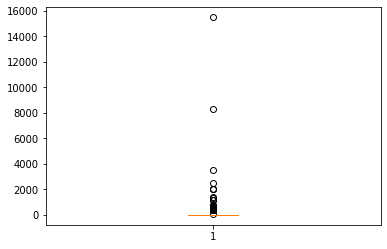

In [116]:
plt.boxplot(housing['MiscVal'])
Q1 = housing['MiscVal'].quantile(0.1)
Q3 = housing['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (housing['MiscVal'] <= Q3 + 1.5*IQR)]
housing.shape

(1291, 81)

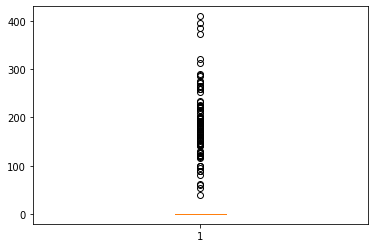

In [117]:
plt.boxplot(housing['ScreenPorch'])
Q1 = housing['ScreenPorch'].quantile(0.1)
Q3 = housing['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (housing['ScreenPorch'] <= Q3 + 1.5*IQR)]
housing.shape

(1274, 81)

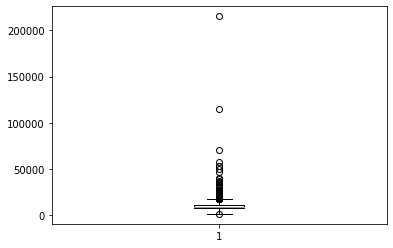

In [118]:
plt.boxplot(housing['LotArea'])
Q1 = housing['LotArea'].quantile(0.1)
Q3 = housing['LotArea'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['LotArea'] >= Q1 - 1.5*IQR) & 
                      (housing['LotArea'] <= Q3 + 1.5*IQR)]
housing.shape

(1255, 81)

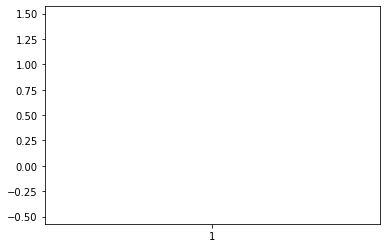

In [119]:
plt.boxplot(housing['MasVnrArea'])
Q1 = housing['MasVnrArea'].quantile(0.1)
Q3 = housing['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (housing['MasVnrArea'] <= Q3 + 1.5*IQR)]
housing.shape

(1253, 81)

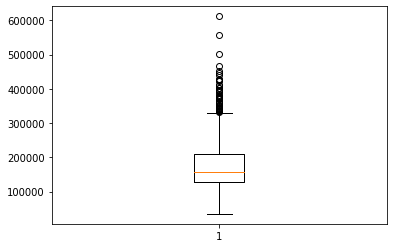

In [120]:
plt.boxplot(housing['SalePrice'])
Q1 = housing['SalePrice'].quantile(0.1)
Q3 = housing['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
housing = housing[(housing['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (housing['SalePrice'] <= Q3 + 1.5*IQR)]
housing.shape

In [121]:
#Verifying the correlation of variables in dataset
cor= housing.corr()

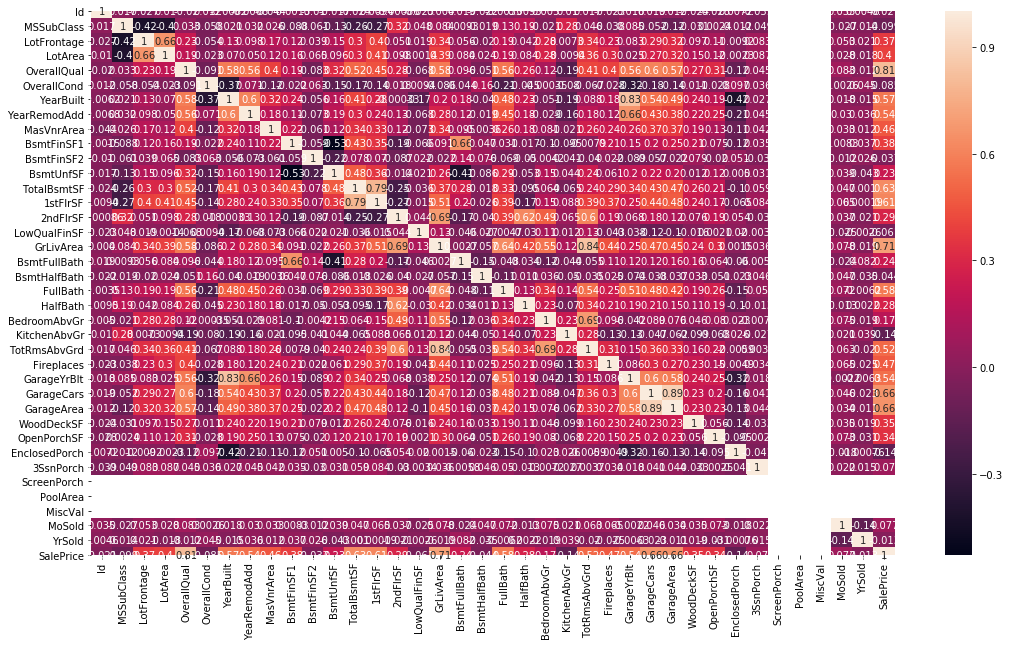

In [122]:
plt.figure(figsize=(18,10))
sns.heatmap(cor, annot=True)
plt.show()

In [123]:
#Data Cleaning
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
Id               1253 non-null int64
MSSubClass       1253 non-null int64
MSZoning         1253 non-null object
LotFrontage      1040 non-null float64
LotArea          1253 non-null int64
Street           1253 non-null object
Alley            82 non-null object
LotShape         1253 non-null object
LandContour      1253 non-null object
Utilities        1253 non-null object
LotConfig        1253 non-null object
LandSlope        1253 non-null object
Neighborhood     1253 non-null object
Condition1       1253 non-null object
Condition2       1253 non-null object
BldgType         1253 non-null object
HouseStyle       1253 non-null object
OverallQual      1253 non-null int64
OverallCond      1253 non-null int64
YearBuilt        1253 non-null int64
YearRemodAdd     1253 non-null int64
RoofStyle        1253 non-null object
RoofMatl         1253 non-null object
Exterior1st      1253 non-n

In [124]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [125]:
round(100*(housing.isnull().sum()/len(housing.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [126]:
#Dealing with NULL Values
#NA in Alley column means No Alley, so we will replace NA by it.
housing['Alley'].fillna('No Alley', inplace=True)

In [127]:
housing['MasVnrType'].fillna('None', inplace=True) 

In [128]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
housing['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [129]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
housing['PoolQC'].fillna('No Pool', inplace=True) 

In [130]:
#NA in Fence column means No Fence, so we will replace NA by it.
housing['Fence'].fillna('No Fence', inplace=True) 

In [131]:
housing['MasVnrArea'].fillna(0, inplace=True) 

In [132]:
housing['LotFrontage'].fillna(0, inplace=True) 

In [133]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

housing['GarageType'].fillna('No Garage', inplace=True) 
housing['GarageFinish'].fillna('No Garage', inplace=True) 
housing['GarageQual'].fillna('No Garage', inplace=True) 
housing['GarageCond'].fillna('No Garage', inplace=True) 

In [134]:
# MiscFeature column has almost 99% null values so we will drop it
housing= housing.drop('MiscFeature', axis=1)

In [135]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [136]:
#converting year to number of years
housing['YearBuilt'] = 2020 - housing['YearBuilt']
housing['YearRemodAdd'] = 2020 - housing['YearRemodAdd']
housing['GarageYrBlt'] = 2020 - housing['GarageYrBlt']
housing['YrSold'] = 2020 - housing['YrSold']

In [137]:
#converting from int type to object to treat the variables as categorical variables
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')

In [138]:
housing_au = housing

In [139]:
#Dummy Variables
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
housing_au[varlist1] = housing_au[varlist1].apply(binary_map)

In [140]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
housing_au[varlist2] = housing_au[varlist2].apply(binary_map)

In [141]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
housing_au[varlist3] = housing_au[varlist3].apply(binary_map)

In [142]:
#Data Preparation
# split into X and y
X = housing_au.drop([ 'Id'], axis=1)

In [143]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [144]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [145]:
# drop categorical variables 
housing_au = housing_au.drop(list(house_categorical.columns), axis=1)

In [146]:
# concat dummy variables with X
housing_au = pd.concat([housing_au, house_dummies], axis=1)

In [147]:
housing_au.shape

(1253, 300)

In [148]:
X=housing_au
y=np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable
X = X.drop("Id",1)

In [149]:
X = X.fillna(X.interpolate())

In [150]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [151]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

In [152]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [153]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.07486601666254845


In [154]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035976,0.009777,0.012707,0.004548,0.0001,{'alpha': 0.0001},-0.107188,-0.119267,-0.089458,-0.085324,...,-0.095677,0.015406,27,-0.045609,-0.047606,-0.049043,-0.047131,-0.051808,-0.048239,0.002094
1,0.033728,0.012457,0.005753,0.003373,0.001,{'alpha': 0.001},-0.106615,-0.118676,-0.089327,-0.085842,...,-0.095315,0.015340,26,-0.045640,-0.047641,-0.049051,-0.047171,-0.051864,-0.048273,0.002100
2,0.019740,0.003048,0.005074,0.003433,0.01,{'alpha': 0.01},-0.102567,-0.114654,-0.088464,-0.087469,...,-0.093058,0.014527,24,-0.046079,-0.047819,-0.049113,-0.047435,-0.052285,-0.048546,0.002105
3,0.017359,0.001255,0.002984,0.000015,0.05,{'alpha': 0.05},-0.096133,-0.102315,-0.087088,-0.086956,...,-0.088350,0.011210,23,-0.047187,-0.048279,-0.049401,-0.047996,-0.053143,-0.049201,0.002095
4,0.018661,0.002355,0.003460,0.000555,0.1,{'alpha': 0.1},-0.093975,-0.094885,-0.086376,-0.085903,...,-0.085701,0.009928,21,-0.047849,-0.048878,-0.049698,-0.048435,-0.053750,-0.049722,0.002102
5,0.018150,0.000924,0.003080,0.000197,0.2,{'alpha': 0.2},-0.091691,-0.088207,-0.085433,-0.084401,...,-0.083018,0.009210,19,-0.048583,-0.049833,-0.050130,-0.049062,-0.054473,-0.050416,0.002101
6,0.018540,0.001555,0.003274,0.000864,0.3,{'alpha': 0.3},-0.090042,-0.085008,-0.084765,-0.083323,...,-0.081492,0.008903,18,-0.049062,-0.050489,-0.050451,-0.049566,-0.054925,-0.050899,0.002085
7,0.017756,0.003153,0.002968,0.000314,0.4,{'alpha': 0.4},-0.088712,-0.083073,-0.084223,-0.082589,...,-0.080417,0.008756,17,-0.049486,-0.050956,-0.050711,-0.049961,-0.055260,-0.051275,0.002060
8,0.018849,0.001850,0.003828,0.000369,0.5,{'alpha': 0.5},-0.087669,-0.081701,-0.083754,-0.082011,...,-0.079607,0.008636,16,-0.049872,-0.051316,-0.050952,-0.050305,-0.055538,-0.051596,0.002033
9,0.017163,0.001790,0.003669,0.001157,0.6,{'alpha': 0.6},-0.086804,-0.080667,-0.083339,-0.081510,...,-0.078973,0.008496,15,-0.050200,-0.051619,-0.051154,-0.050595,-0.055758,-0.051865,0.002005


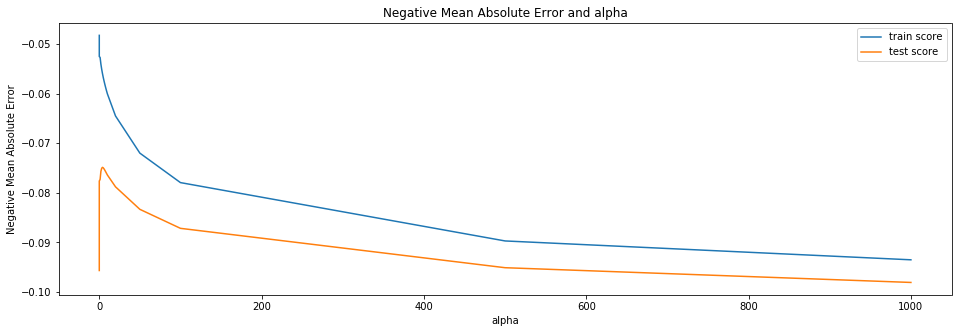

In [155]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [156]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.25133069e-04,  8.65401512e-06, -2.20588487e-02,  0.00000000e+00,
       -2.83888524e-03, -1.18365688e-03,  2.25181767e-05,  6.00416351e-05,
        6.64274906e-05, -2.19274206e-05,  1.04541700e-04,  3.79571315e-02,
        7.40942395e-05,  1.14837775e-04, -3.21353075e-06,  1.85718479e-04,
        5.54378952e-04,  1.35135741e-04,  1.18243469e-04,  2.25555624e-04,
        1.18956384e-04,  2.30837991e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.17377471e-04,  2.26816826e-04, -1.18304353e-02,
        7.74590224e-03,  2.28602815e-02,  6.21192548e-03, -3.96113277e-02,
        4.86008503e-02,  2.37348477e-02, -2.13641738e-02, -1.51145142e-02,
       -1.79790545e-02,  2.19627155e-02, -6.61904575e-02, -1.71677283e-02,
        5.50421258e-03,  7.11079250e-02,  1.02537428e-02,  2.85416204e-02,
        3.77121651e-03,  2.17359114e-02,  3.66494068e-02, -1.17517976e-02,
       -4.97532204e-02,  5.19227137e-03,  1.61624950e-02, -2.91518010e-02,
        1.11370395e-02,  

In [157]:
#R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9542713047489458


In [158]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8856160792892318


In [159]:
#Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   11.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [160]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.687445,0.283207,0.007837,0.004689,0.0001,{'alpha': 0.0001},-0.084532,-0.075128,-0.080840,-0.080750,...,-0.076314,0.008553,1,-0.051653,-0.052998,-0.052735,-0.052312,-0.057068,-0.053353,0.001912
1,0.049332,0.008849,0.003751,0.000741,0.001,{'alpha': 0.001},-0.083492,-0.081638,-0.086583,-0.081620,...,-0.079955,0.006999,2,-0.066722,-0.067897,-0.065221,-0.068409,-0.070419,-0.067734,0.001734
2,0.026283,0.003167,0.003470,0.000528,0.01,{'alpha': 0.01},-0.103214,-0.103143,-0.107670,-0.104532,...,-0.100988,0.007486,3,-0.097167,-0.096972,-0.095096,-0.097889,-0.101156,-0.097656,0.001978
3,0.093968,0.010687,0.004140,0.000924,0.05,{'alpha': 0.05},-0.104479,-0.107009,-0.110225,-0.107466,...,-0.103663,0.007491,6,-0.100558,-0.099341,-0.097897,-0.100280,-0.104159,-0.100447,0.002076
4,0.077769,0.017618,0.003362,0.000785,0.1,{'alpha': 0.1},-0.103125,-0.107279,-0.110803,-0.107627,...,-0.103606,0.007605,5,-0.100879,-0.099408,-0.098105,-0.100360,-0.104457,-0.100642,0.002128
5,0.073795,0.021449,0.003360,0.000784,0.2,{'alpha': 0.2},-0.101444,-0.108069,-0.111722,-0.107823,...,-0.103595,0.008046,4,-0.101169,-0.099835,-0.098513,-0.100527,-0.104730,-0.100955,0.002083
6,0.056735,0.016731,0.003373,0.000578,0.3,{'alpha': 0.3},-0.101531,-0.108765,-0.112625,-0.108073,...,-0.104052,0.008204,7,-0.101838,-0.100321,-0.099262,-0.101000,-0.105328,-0.101550,0.002069
7,0.049333,0.010733,0.003942,0.000752,0.4,{'alpha': 0.4},-0.102207,-0.109558,-0.113650,-0.108378,...,-0.104762,0.008231,8,-0.102552,-0.101023,-0.100096,-0.101758,-0.106033,-0.102293,0.002039
8,0.048148,0.011888,0.004230,0.000648,0.5,{'alpha': 0.5},-0.102899,-0.110454,-0.114802,-0.108408,...,-0.105546,0.008143,9,-0.103404,-0.101884,-0.101224,-0.102502,-0.106904,-0.103184,0.001994
9,0.036109,0.004582,0.003382,0.000361,0.6,{'alpha': 0.6},-0.103788,-0.111255,-0.116410,-0.108324,...,-0.106476,0.008055,10,-0.104340,-0.102863,-0.102433,-0.103423,-0.107883,-0.104188,0.001955


In [161]:
# Finding r2 score of Lasso Model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [162]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.285991,0.074124,0.003274,0.000595,0.0001,{'alpha': 0.0001},0.908424,0.898260,0.918488,0.894750,...,0.913045,0.018164,1,0.963689,0.963571,0.959508,0.963844,0.957232,0.961569,0.002711
1,0.043559,0.004200,0.003574,0.000200,0.001,{'alpha': 0.001},0.915733,0.897435,0.904772,0.904769,...,0.911160,0.012439,2,0.936933,0.939963,0.936846,0.938355,0.934768,0.937373,0.001728
2,0.025395,0.002110,0.004074,0.001697,0.01,{'alpha': 0.01},0.879899,0.836472,0.860732,0.833353,...,0.855986,0.018278,3,0.862228,0.870060,0.865892,0.871275,0.865286,0.866948,0.003303
3,0.113485,0.023780,0.004762,0.000919,0.05,{'alpha': 0.05},0.875735,0.824052,0.852198,0.826438,...,0.847306,0.019635,5,0.850572,0.862864,0.856738,0.863348,0.856411,0.857986,0.004724
4,0.108799,0.031903,0.004394,0.000467,0.1,{'alpha': 0.1},0.877887,0.823348,0.850522,0.827462,...,0.847411,0.020136,4,0.849360,0.862511,0.856137,0.862201,0.855417,0.857125,0.004878
5,0.082157,0.031709,0.004048,0.000822,0.2,{'alpha': 0.2},0.880421,0.820448,0.847812,0.828123,...,0.846788,0.021382,6,0.847764,0.861421,0.854926,0.861038,0.854376,0.855905,0.005027
6,0.208419,0.197586,0.013886,0.002771,0.3,{'alpha': 0.3},0.881048,0.817541,0.844628,0.828299,...,0.845483,0.022160,7,0.845479,0.860012,0.853090,0.859353,0.852842,0.854155,0.005281
7,0.068448,0.018751,0.013801,0.005756,0.4,{'alpha': 0.4},0.880704,0.813965,0.840908,0.827783,...,0.843462,0.022915,8,0.843252,0.858041,0.850926,0.857219,0.850953,0.852078,0.005338
8,0.051088,0.006550,0.005853,0.001994,0.5,{'alpha': 0.5},0.879874,0.809932,0.836593,0.827814,...,0.841090,0.023586,9,0.840534,0.855620,0.848171,0.855195,0.848542,0.849612,0.005530
9,0.061506,0.021283,0.036503,0.054563,0.6,{'alpha': 0.6},0.878627,0.806526,0.831923,0.828052,...,0.838585,0.023996,10,0.837373,0.853351,0.845060,0.852999,0.845590,0.846875,0.005911


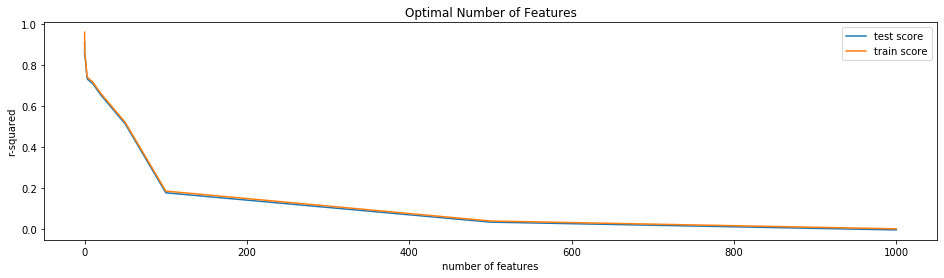

In [163]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [164]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.07631426214998926


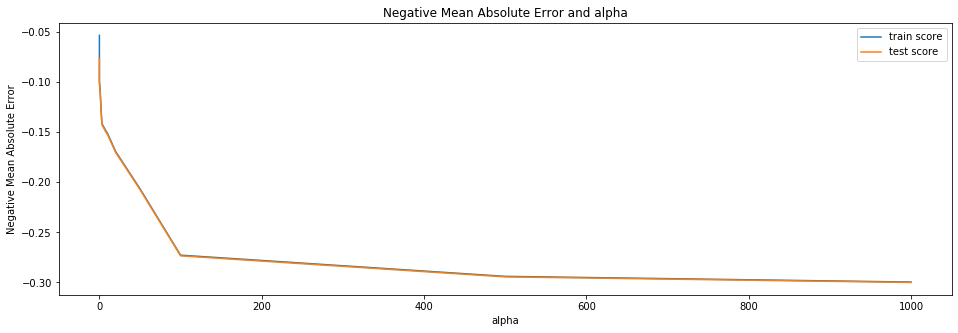

In [165]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [166]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

array([-1.17086381e-04,  8.81994285e-06, -2.34769867e-02,  0.00000000e+00,
       -3.07390000e-03, -1.01522217e-03,  1.62683366e-05,  1.17577643e-04,
        1.25312328e-04,  4.68062579e-05,  3.46669101e-05,  2.83264394e-02,
        2.02523275e-04,  2.47629914e-04,  1.29086919e-04,  4.86261098e-05,
        5.14017352e-04,  1.42286547e-04,  1.14350910e-04,  2.11810646e-04,
        1.14404581e-04,  2.37609575e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.30931415e-04,  7.87675115e-04, -5.68887691e-03,
        0.00000000e+00,  2.32558038e-02,  2.70066354e-03, -6.31241559e-02,
        2.28087100e-02,  0.00000000e+00, -3.15191411e-02, -1.47605375e-02,
       -3.52491773e-02,  0.00000000e+00, -1.19387812e-01, -2.80200242e-02,
        0.00000000e+00,  8.99605437e-02,  0.00000000e+00,  2.68315159e-02,
        1.07476552e-02,  2.45866145e-02,  4.38650262e-02, -1.56529322e-03,
       -7.00790863e-02,  7.68173338e-03,  0.00000000e+00, -3.92487750e-02,
        4.36287321e-03,  

In [167]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9574508513753035


In [168]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8813809842730489


## Output code for Q&A

### (Please note that, I'm not splitting data into train and test for this section) 

In [206]:
#Converting coef matrix to readable df (Also useful for comparing coeffients with different alphas(for Q&A))
names=X.columns

def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Coefs for Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    output_path= r"C:/Users/hpakki/Desktop/migration/UG_Assgn3/"
    df.to_excel(output_path+'output_Lasso.xlsx')
    return df

In [198]:
#The first alpha value is the best value.
lasso([0.0001,0.0002])

,Feature Name,Coefs for Alpha = 0.000100,Coefs for Alpha = 0.000200
0,LotFrontage,0.000085,0.000096
1,LotArea,0.000006,0.000005
2,Street,-0.013608,-0.000000
3,Utilities,0.000000,0.000000
4,YearBuilt,-0.002465,-0.002442
...,...,...,...
293,SaleCondition_AdjLand,0.121114,0.068646
294,SaleCondition_Alloca,0.019114,0.015589
295,SaleCondition_Family,0.015494,0.001734
296,SaleCondition_Normal,0.066093,0.065221


In [199]:
#Converting coef matrix to readable df (Also useful for comparing coeffients with different alphas(for Q&A))


def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        ridge = Ridge(alpha=alpha)
        
        # Fit the Ridge regression
        ridge.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Coefs for Alpha = %0.2f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the datafram    
    output_path= r"C:/Users/hpakki/Desktop/migration/UG_Assgn3/"
    df.to_excel(output_path+'output_Ridge.xlsx') 
    return df

In [200]:
#The first alpha value is the best value
ridge([4,8])

,Feature Name,Coefs for Alpha = 4.00,Coefs for Alpha = 8.00
0,LotFrontage,0.000047,0.000046
1,LotArea,0.000006,0.000006
2,Street,-0.029879,-0.017007
3,Utilities,0.000000,0.000000
4,YearBuilt,-0.002423,-0.002417
...,...,...,...
293,SaleCondition_AdjLand,0.070657,0.043108
294,SaleCondition_Alloca,0.048199,0.035637
295,SaleCondition_Family,0.021278,0.013567
296,SaleCondition_Normal,0.069408,0.065407


In [201]:
#Removing 5 most important predictors in the model
X=housing_au
y=np.log(X.SalePrice)
X = X.drop("SalePrice",1)
X = X.drop("Id",1)
X = X.drop("MSZoning_FV",1)
X = X.drop("MSZoning_RL",1)
X = X.drop("MSZoning_RH",1)
X = X.drop("MSZoning_RM",1)
X = X.drop("OverallCond_3",1)
X = X.fillna(X.interpolate())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [205]:
lasso([0.0001]) #For finding the new five most important predictor variables

,Feature Name,Coefs for Alpha = 0.000100
0,LotFrontage,0.000056
1,LotArea,0.000006
2,Street,-0.057702
3,Utilities,0.000000
4,YearBuilt,-0.002527
...,...,...
288,SaleCondition_AdjLand,0.132875
289,SaleCondition_Alloca,0.025988
290,SaleCondition_Family,0.022132
291,SaleCondition_Normal,0.074927
